In [1]:
#Cesar Borroto
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the Titanic dataset (using Seaborn's built-in Titanic dataset)
titanic = sns.load_dataset("titanic")

In [3]:
# Data Preprocessing
# Fill missing values and encode categorical variables
titanic["age"].fillna(titanic["age"].median(), inplace=True)
titanic["embarked"].fillna(titanic["embarked"].mode()[0], inplace=True)
titanic["fare"].fillna(titanic["fare"].median(), inplace=True)

In [4]:
# Add 'Unknown' to the categories of the 'deck' column if it doesn't exist
if "Unknown" not in titanic["deck"].cat.categories:
    titanic["deck"] = titanic["deck"].cat.add_categories("Unknown")

titanic["deck"].fillna("Unknown", inplace=True)

In [5]:
# Select features and target variable
X = titanic[["pclass", "age", "fare"]]
y = titanic["survived"]

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Create a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

In [8]:
# Fit the model to the training data
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [10]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [11]:
# Output the evaluation results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.69
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.80      0.75       105
           1       0.65      0.53      0.58        74

    accuracy                           0.69       179
   macro avg       0.68      0.66      0.67       179
weighted avg       0.68      0.69      0.68       179

Confusion Matrix:
 [[84 21]
 [35 39]]


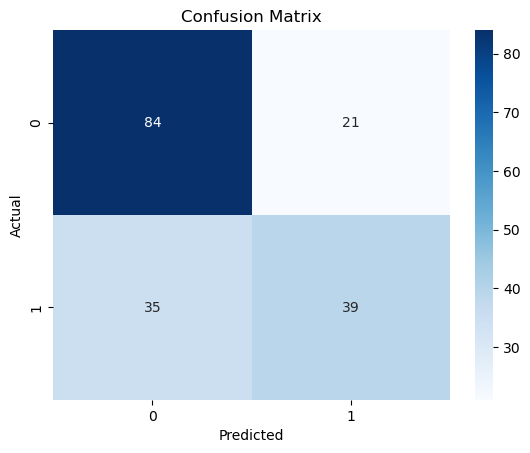

In [12]:
# Visualize the Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()